# Machine Learning Assignment 3
###  Prepared by Sujil Kumar K.M (D00242726)
##### Trump Approval Ratings

In [142]:
import pandas as pd
import numpy as np
import os
df = pd.read_csv('E:\\Mchine_Learning\\temp_repo_for_ml_reflection\\approval_topline.csv')
df.head()

,president,subgroup,modeldate,approve_estimate,approve_hi,approve_lo,disapprove_estimate,disapprove_hi,disapprove_lo,timestamp
0,Donald Trump,Voters,1/20/2021,39.41,45.87,32.95,56.71,62.47,50.95,11:52:51 20 Jan 2021
1,Donald Trump,Adults,1/20/2021,36.95,42.81,31.09,59.62,65.47,53.76,11:49:36 20 Jan 2021
2,Donald Trump,All polls,1/20/2021,38.62,44.94,32.30,57.85,63.68,52.02,11:47:59 20 Jan 2021
3,Donald Trump,All polls,1/19/2021,39.16,45.18,33.14,57.43,62.94,51.92,22:36:53 19 Jan 2021
4,Donald Trump,Adults,1/19/2021,38.05,43.54,32.56,59.08,64.49,53.67,22:38:31 19 Jan 2021


This data contains a trendline for the approval ratings for former US President Donald Trump

In [143]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4377 entries, 0 to 4376
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   president            4377 non-null   object 
 1   subgroup             4377 non-null   object 
 2   modeldate            4377 non-null   object 
 3   approve_estimate     4377 non-null   float64
 4   approve_hi           4377 non-null   float64
 5   approve_lo           4377 non-null   float64
 6   disapprove_estimate  4377 non-null   float64
 7   disapprove_hi        4377 non-null   float64
 8   disapprove_lo        4377 non-null   float64
 9   timestamp            4377 non-null   object 
dtypes: float64(6), object(4)
memory usage: 342.1+ KB
None


In [144]:
# checking columns names
df.columns

Index(['president', 'subgroup', 'modeldate', 'approve_estimate', 'approve_hi',
       'approve_lo', 'disapprove_estimate', 'disapprove_hi', 'disapprove_lo',
       'timestamp'],
      dtype='object')

In [145]:
# Quick Glance
Glance=10
view=df.head(Glance)
print(view)


      president   subgroup  modeldate  approve_estimate  approve_hi  \
0  Donald Trump     Voters  1/20/2021             39.41       45.87   
1  Donald Trump     Adults  1/20/2021             36.95       42.81   
2  Donald Trump  All polls  1/20/2021             38.62       44.94   
3  Donald Trump  All polls  1/19/2021             39.16       45.18   
4  Donald Trump     Adults  1/19/2021             38.05       43.54   
5  Donald Trump     Voters  1/19/2021             40.15       45.83   
6  Donald Trump     Adults  1/18/2021             36.15       41.19   
7  Donald Trump     Voters  1/18/2021             39.77       45.41   
8  Donald Trump  All polls  1/18/2021             38.26       44.22   
9  Donald Trump     Voters  1/17/2021             40.24       45.61   

   approve_lo  disapprove_estimate  disapprove_hi  disapprove_lo  \
0       32.95                56.71          62.47          50.95   
1       31.09                59.62          65.47          53.76   
2       32.30 

In [146]:
# deleting duplicates
df.drop_duplicates(keep='first',inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4377 entries, 0 to 4376
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   president            4377 non-null   object 
 1   subgroup             4377 non-null   object 
 2   modeldate            4377 non-null   object 
 3   approve_estimate     4377 non-null   float64
 4   approve_hi           4377 non-null   float64
 5   approve_lo           4377 non-null   float64
 6   disapprove_estimate  4377 non-null   float64
 7   disapprove_hi        4377 non-null   float64
 8   disapprove_lo        4377 non-null   float64
 9   timestamp            4377 non-null   object 
dtypes: float64(6), object(4)
memory usage: 376.1+ KB
None


In [147]:
# renaming feature name
df.rename( {'predicted_probability':'pred_prob' } , axis=1 , inplace = True)

Column names are seems to be meaningful and suitable, I am not changing any names.

In [148]:
# describing the dataset

description=df.describe()
description

,approve_estimate,approve_hi,approve_lo,disapprove_estimate,disapprove_hi,disapprove_lo
count,4377.00,4377.00,4377.00,4377.00,4377.00,4377.00
mean,41.46,45.75,37.18,53.49,57.85,49.13
std,2.01,2.20,1.95,1.96,2.00,2.03
min,34.93,38.82,31.04,37.00,43.29,30.71
25%,40.31,44.31,36.12,52.54,56.75,48.30
50%,41.62,46.01,37.44,53.39,57.70,49.14
75%,42.86,47.24,38.52,54.54,58.99,50.20
max,48.62,53.80,43.43,60.59,65.84,55.33


In [149]:
# limiting the results upto two possible digits after decimals 
pd.set_option('precision', 2)
description_wth_precesion=df.describe()
description_wth_precesion

,approve_estimate,approve_hi,approve_lo,disapprove_estimate,disapprove_hi,disapprove_lo
count,4377.00,4377.00,4377.00,4377.00,4377.00,4377.00
mean,41.46,45.75,37.18,53.49,57.85,49.13
std,2.01,2.20,1.95,1.96,2.00,2.03
min,34.93,38.82,31.04,37.00,43.29,30.71
25%,40.31,44.31,36.12,52.54,56.75,48.30
50%,41.62,46.01,37.44,53.39,57.70,49.14
75%,42.86,47.24,38.52,54.54,58.99,50.20
max,48.62,53.80,43.43,60.59,65.84,55.33


In [150]:
types=df.dtypes
print(types)

president               object
subgroup                object
modeldate               object
approve_estimate       float64
approve_hi             float64
approve_lo             float64
disapprove_estimate    float64
disapprove_hi          float64
disapprove_lo          float64
timestamp               object
dtype: object


In [151]:
df.head()

,president,subgroup,modeldate,approve_estimate,approve_hi,approve_lo,disapprove_estimate,disapprove_hi,disapprove_lo,timestamp
0,Donald Trump,Voters,1/20/2021,39.41,45.87,32.95,56.71,62.47,50.95,11:52:51 20 Jan 2021
1,Donald Trump,Adults,1/20/2021,36.95,42.81,31.09,59.62,65.47,53.76,11:49:36 20 Jan 2021
2,Donald Trump,All polls,1/20/2021,38.62,44.94,32.30,57.85,63.68,52.02,11:47:59 20 Jan 2021
3,Donald Trump,All polls,1/19/2021,39.16,45.18,33.14,57.43,62.94,51.92,22:36:53 19 Jan 2021
4,Donald Trump,Adults,1/19/2021,38.05,43.54,32.56,59.08,64.49,53.67,22:38:31 19 Jan 2021


Data types seems to be ok , no need to make any changes

In [152]:
### Dicussion regarding the balancing of data set

In [153]:
'''
Correlations between Attributes 
#######################################################################################################
Explain postive and negative Correlations

'''

'\nCorrelations between Attributes \n#######################################################################################################\nExplain postive and negative Correlations\n\n'

In [154]:
# looking for null values
df.isnull().sum()

president              0
subgroup               0
modeldate              0
approve_estimate       0
approve_hi             0
approve_lo             0
disapprove_estimate    0
disapprove_hi          0
disapprove_lo          0
timestamp              0
dtype: int64

In [155]:
# checking number of rows in the dataframe
df.shape[0]

4377

We do not need this much data for analysis, keeping the size of data between n*100 to n*1000 for balance

In [156]:
# taking the first 15k records for the analysis
df = df[:15000]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4377 entries, 0 to 4376
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   president            4377 non-null   object 
 1   subgroup             4377 non-null   object 
 2   modeldate            4377 non-null   object 
 3   approve_estimate     4377 non-null   float64
 4   approve_hi           4377 non-null   float64
 5   approve_lo           4377 non-null   float64
 6   disapprove_estimate  4377 non-null   float64
 7   disapprove_hi        4377 non-null   float64
 8   disapprove_lo        4377 non-null   float64
 9   timestamp            4377 non-null   object 
dtypes: float64(6), object(4)
memory usage: 376.1+ KB


In [157]:
# df['_medpoly2'].isnull().sum()

I have noticed around 3700 columnd are empty in distric column, it 24% of total number of columns, I am not going to change anything in these feilds at the moment.

In [158]:
Correlations=df.corr()
Correlations

,approve_estimate,approve_hi,approve_lo,disapprove_estimate,disapprove_hi,disapprove_lo
approve_estimate,1.00,0.97,0.96,-0.82,-0.84,-0.75
approve_hi,0.97,1.00,0.88,-0.80,-0.80,-0.76
approve_lo,0.96,0.88,1.00,-0.78,-0.82,-0.70
disapprove_estimate,-0.82,-0.80,-0.78,1.00,0.97,0.97
disapprove_hi,-0.84,-0.80,-0.82,0.97,1.00,0.89
disapprove_lo,-0.75,-0.76,-0.70,0.97,0.89,1.00


In [159]:
# Skew to identify the nature of the data.
'''Skew refer to distribution that is assumed to be Gaussian (Normal or Bell Curve)
It could be shifted or squashed in one directions or another 
Machine learning assume to have a gaussian distribution'''
skew_data=df.skew()
print(skew_data)

approve_estimate      -0.40
approve_hi            -0.29
approve_lo            -0.49
disapprove_estimate   -1.44
disapprove_hi         -0.85
disapprove_lo         -1.83
dtype: float64


### Data Visualization

In [167]:
from matplotlib import pyplot

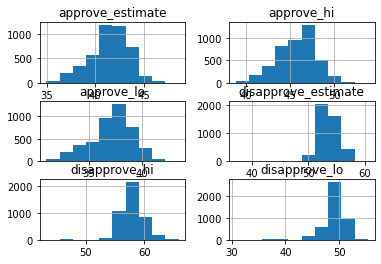

'\nHelps us understand the data is skew, Gaussian and exponential distribution \nAlso help us to see the possible outliner'

In [170]:
histogram=df.hist()
layout = 3,2
pyplot.show()
'''
Helps us understand the data is skew, Gaussian and exponential distribution 
Also help us to see the possible outliner'''

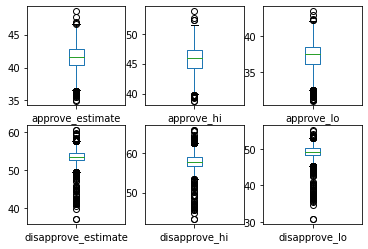

In [164]:
M=df.plot(kind='box',subplots=True,layout=(2,3),sharex=False,sharey=False)
layout = 5,5